In [1]:
import pandas as pd
import nltk
from nltk import pos_tag, word_tokenize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# load data from CSV files
train_df = pd.read_csv('training.csv')
test_df = pd.read_csv('test.csv')

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:992)>
[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify
[nltk_data]     failed: unable to get local issuer certificate
[nltk_data]     (_ssl.c:992)>


In [2]:
# function to convert text to POS tags
def text_to_pos(text):
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)
    # extract only POS tags
    pos_sequence = " ".join(tag for _, tag in pos_tags)
    return pos_sequence

# apply the transformation to the training and test data
train_df['pos_tags'] = train_df['tweet'].apply(text_to_pos)
test_df['pos_tags'] = test_df['tweet'].apply(text_to_pos)

# save the transformed data with POS tags to new CSV files
train_df[['pos_tags', 'label']].to_csv('training_pos.csv', index=False)
test_df[['pos_tags', 'label']].to_csv('test_pos.csv', index=False)

print("POS-tagged data has been saved to 'training_pos.csv' and 'test_pos.csv'.")

POS-tagged data has been saved to 'training_pos.csv' and 'test_pos.csv'.


In [2]:
# load the transformed POS-tagged data
train_df = pd.read_csv('training_pos.csv')
test_df = pd.read_csv('test_pos.csv')

# extract the POS sequences (features) and labels (target)
X_train_text = train_df['pos_tags']
y_train = train_df['label']
X_test_text = test_df['pos_tags']
y_test = test_df['label']


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

# configure TfidfVectorizer for n-grams up to 4-grams
vectorizer = TfidfVectorizer(ngram_range=(1, 4))  # includes unigrams to 4-grams

# fit and transform the training data, and transform the test data
X_train = vectorizer.fit_transform(X_train_text)
X_test = vectorizer.transform(X_test_text)

# check the feature dimensions
print(f"Number of features: {X_train.shape[1]}")


Number of features: 166944


/var/folders/xr/8_04k68n67g0rjkj679cscmh0000gn/T/ipykernel_3909/112854865.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(freqs), y=list(features), palette="viridis", orient="h")


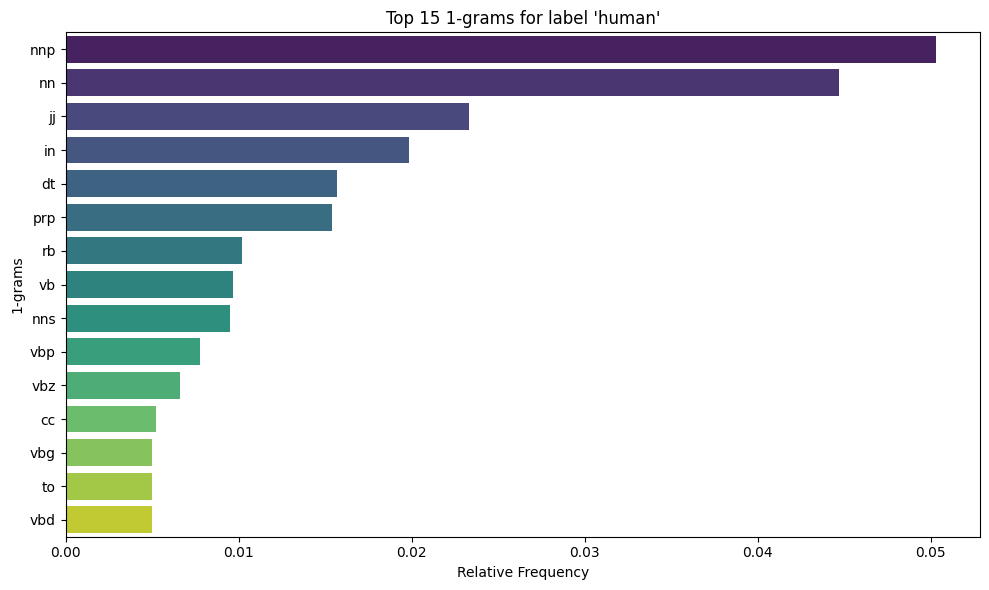

/var/folders/xr/8_04k68n67g0rjkj679cscmh0000gn/T/ipykernel_3909/112854865.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(freqs), y=list(features), palette="viridis", orient="h")


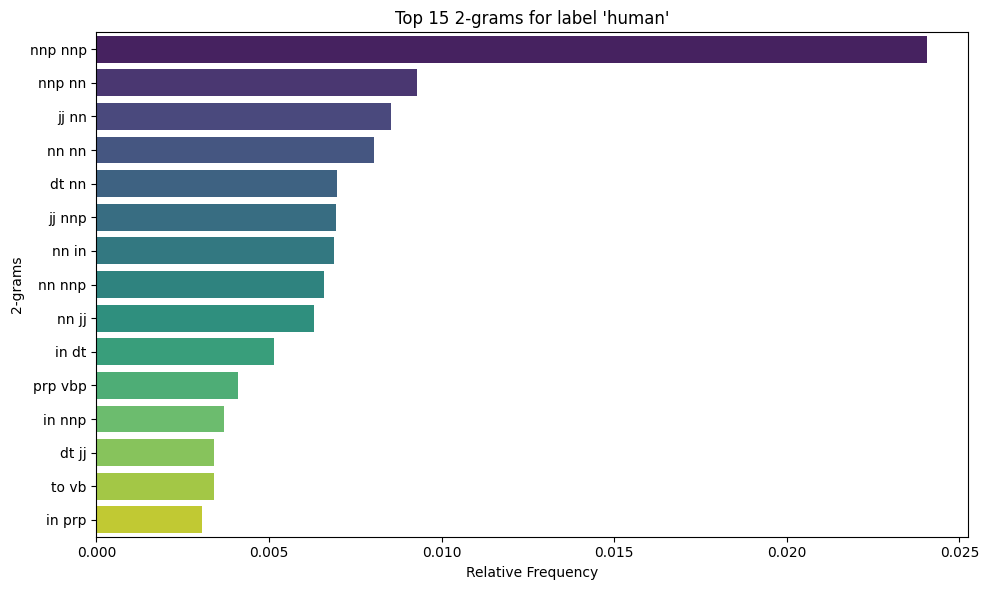

/var/folders/xr/8_04k68n67g0rjkj679cscmh0000gn/T/ipykernel_3909/112854865.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(freqs), y=list(features), palette="viridis", orient="h")


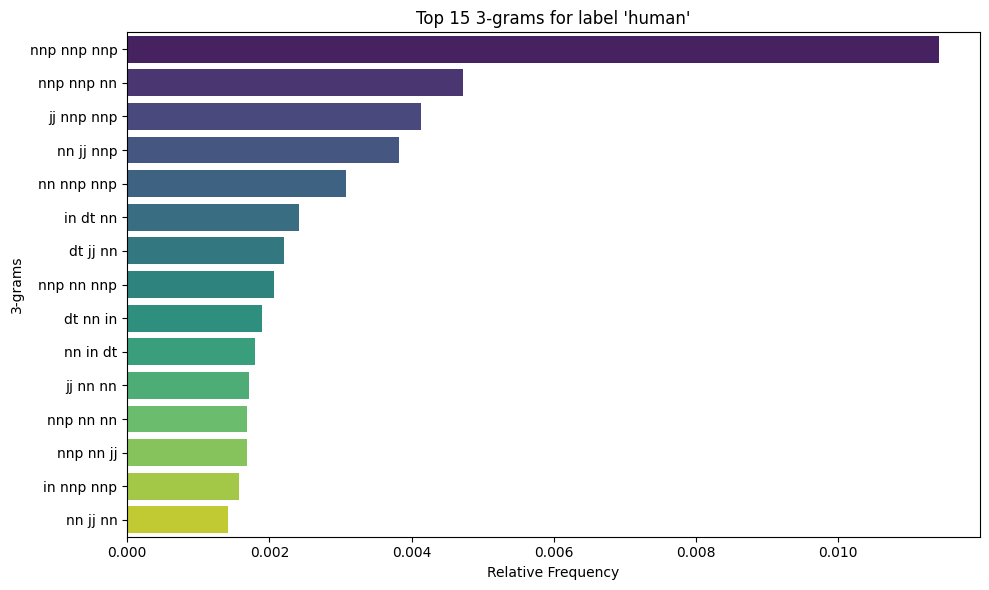

/var/folders/xr/8_04k68n67g0rjkj679cscmh0000gn/T/ipykernel_3909/112854865.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(freqs), y=list(features), palette="viridis", orient="h")


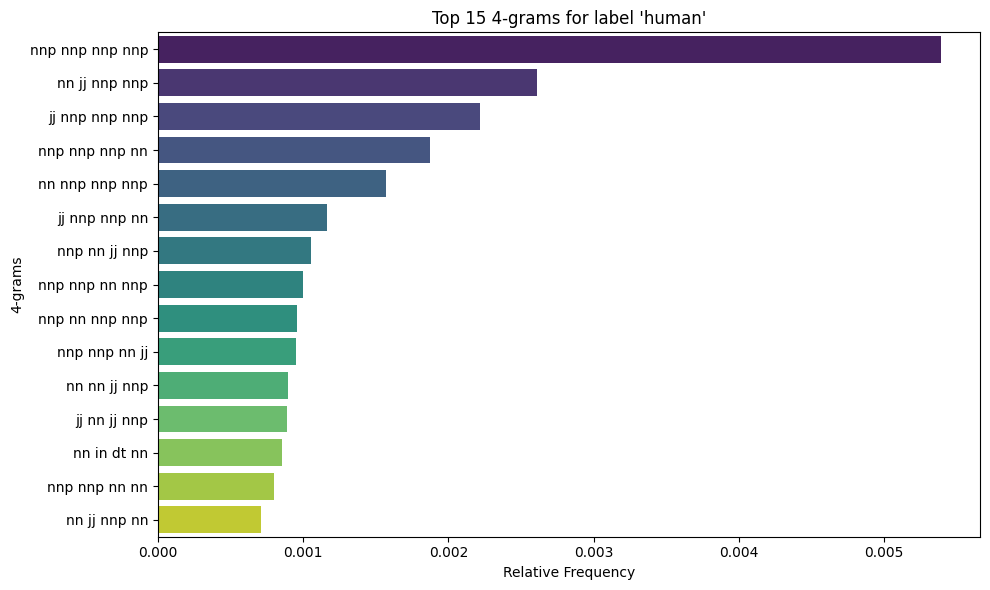

/var/folders/xr/8_04k68n67g0rjkj679cscmh0000gn/T/ipykernel_3909/112854865.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(freqs), y=list(features), palette="viridis", orient="h")


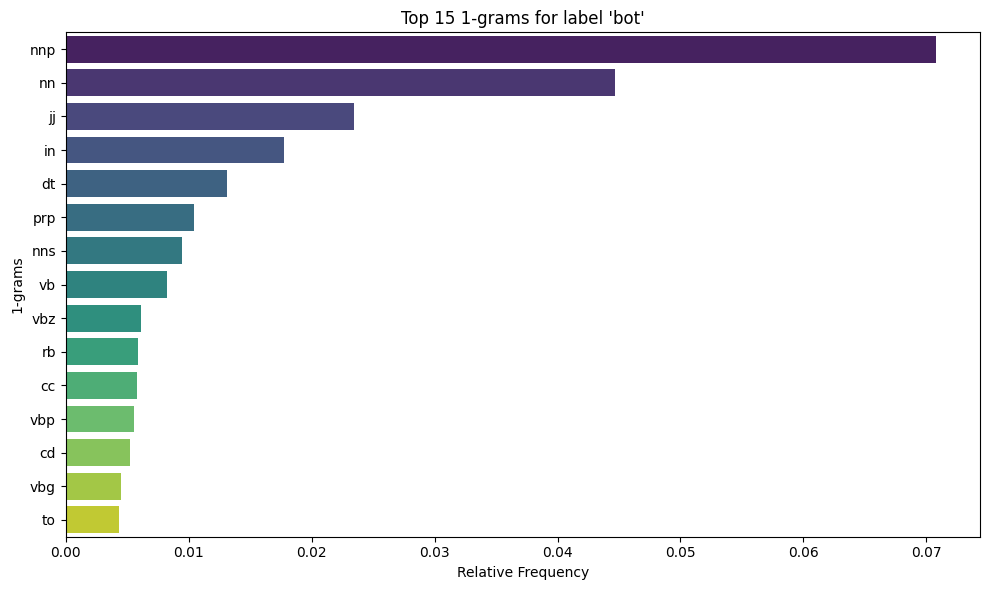

/var/folders/xr/8_04k68n67g0rjkj679cscmh0000gn/T/ipykernel_3909/112854865.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(freqs), y=list(features), palette="viridis", orient="h")


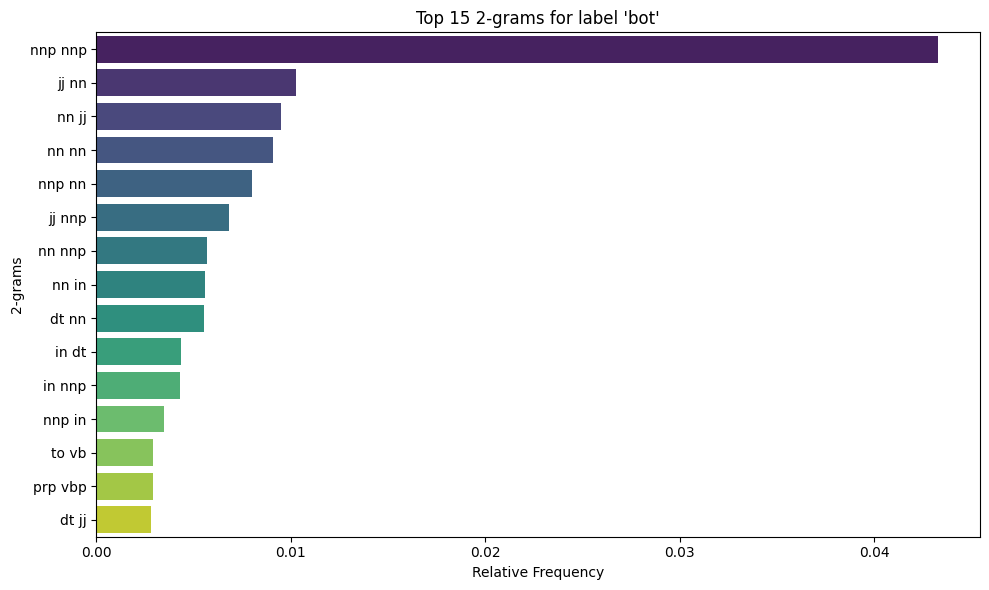

/var/folders/xr/8_04k68n67g0rjkj679cscmh0000gn/T/ipykernel_3909/112854865.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(freqs), y=list(features), palette="viridis", orient="h")


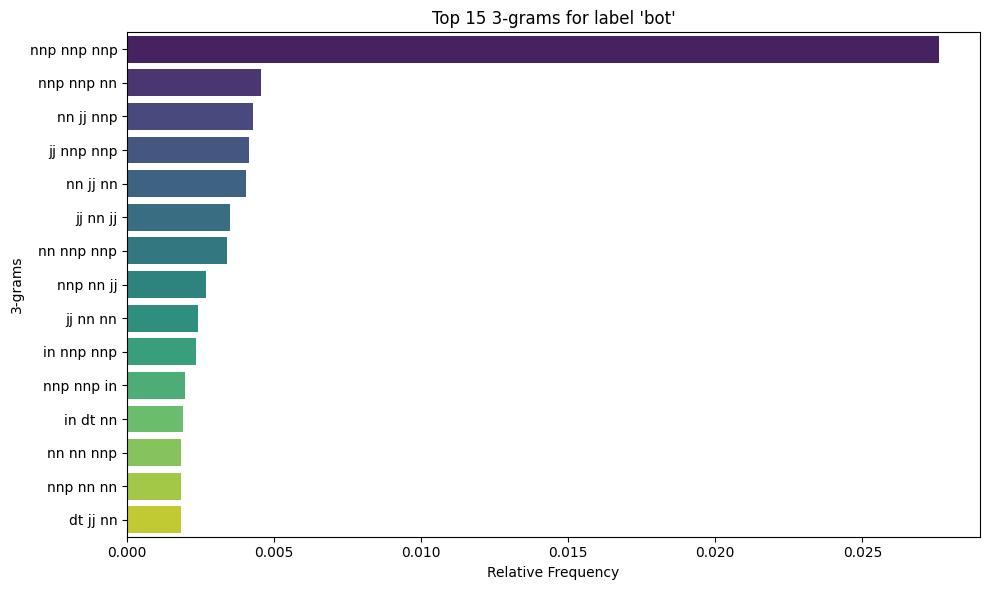

/var/folders/xr/8_04k68n67g0rjkj679cscmh0000gn/T/ipykernel_3909/112854865.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(freqs), y=list(features), palette="viridis", orient="h")


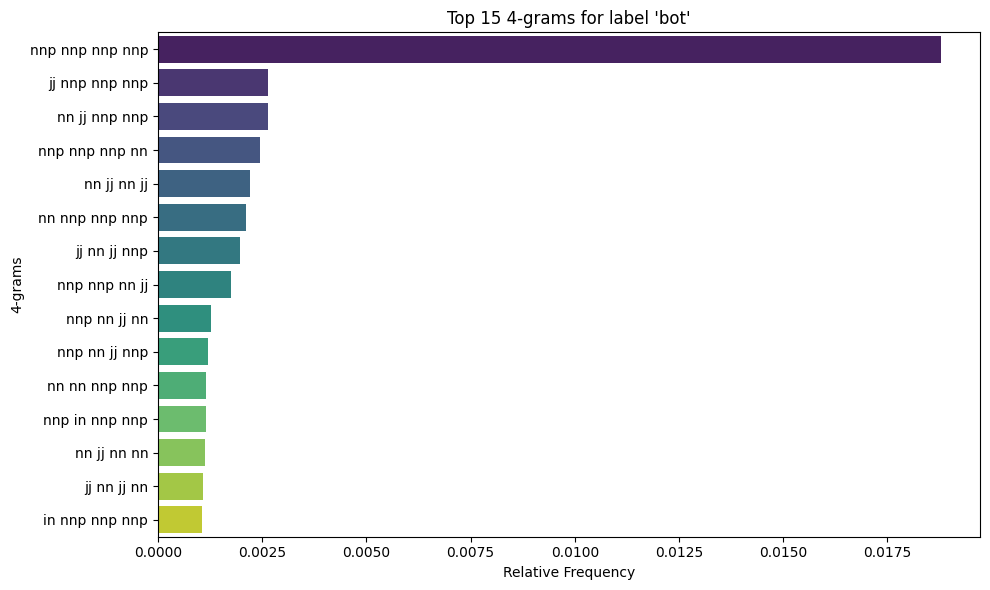

In [24]:
# compute relative frequencies of n-grams per label
def compute_relative_frequencies(df, label_column, text_column, ngram_range=(1, 4)):
    vectorizer = TfidfVectorizer(ngram_range=ngram_range, use_idf=False, norm=None, binary=False)
    counts = vectorizer.fit_transform(df[text_column])
    feature_names = vectorizer.get_feature_names_out()
    labels = df[label_column].unique()
    frequencies = {}

    for label in labels:
        label_counts = counts[df[label_column] == label].sum(axis=0)
        label_total = label_counts.sum()
        frequencies[label] = (np.array(label_counts).flatten() / label_total, feature_names)

    return frequencies

relative_freqs = compute_relative_frequencies(train_df, 'label', 'pos_tags', ngram_range=(1, 4))

# plot top 15 n-grams per n=1,2,3,4
n_values = [1, 2, 3, 4]
def plot_top_ngrams(frequencies, n_values, label):
    for n in n_values:
        ngram_freqs = [(freq, feature) for freq, feature in zip(*frequencies[label]) if len(feature.split()) == n]
        ngram_freqs = sorted(ngram_freqs, reverse=True)[:15]
        freqs, features = zip(*ngram_freqs)

        plt.figure(figsize=(10, 6))
        sns.barplot(x=list(freqs), y=list(features), palette="viridis", orient="h")
        plt.title(f"Top 15 {n}-grams for label '{label}'")
        plt.xlabel("Relative Frequency")
        plt.ylabel(f"{n}-grams")
        plt.tight_layout()
        plt.show()

for label in relative_freqs:
    plot_top_ngrams(relative_freqs, n_values, label)


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# initialize classifier
clf = LogisticRegression(random_state=39, max_iter=500)  # Logistic Regression

# train the classifier
clf.fit(X_train, y_train)

# make predictions on the test data
y_pred = clf.predict(X_test)

# evaluate the performance
print("Classification Report Logistic Regression:\n", classification_report(y_test, y_pred))
print("Accuracy:", round(accuracy_score(y_test, y_pred), 2))


Classification Report Logistic Regression:
               precision    recall  f1-score   support

         bot       0.93      0.85      0.89      1320
       human       0.86      0.94      0.90      1320

    accuracy                           0.89      2640
   macro avg       0.90      0.89      0.89      2640
weighted avg       0.90      0.89      0.89      2640

Accuracy: 0.89


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# initialize classifier
clf = RandomForestClassifier(random_state=39, n_estimators=100)

# train the classifier
clf.fit(X_train, y_train)

# make predictions on the test data
y_pred = clf.predict(X_test)

# evaluate the performance
print("Classification Report Random Forest:\n", classification_report(y_test, y_pred))
print("Accuracy:", round(accuracy_score(y_test, y_pred), 2))


Classification Report Random Forest:
               precision    recall  f1-score   support

         bot       0.94      0.88      0.91      1320
       human       0.88      0.95      0.91      1320

    accuracy                           0.91      2640
   macro avg       0.91      0.91      0.91      2640
weighted avg       0.91      0.91      0.91      2640

Accuracy: 0.91


In [8]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# initialize classifier
clf = GradientBoostingClassifier(random_state=39)

# train the classifier
clf.fit(X_train, y_train)

# make predictions on the test data
y_pred = clf.predict(X_test)

# evaluate the performance
print("Gradient Boosting Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", round(accuracy_score(y_test, y_pred), 2))


Gradient Boosting Report:
               precision    recall  f1-score   support

         bot       0.93      0.89      0.91      1320
       human       0.90      0.93      0.91      1320

    accuracy                           0.91      2640
   macro avg       0.91      0.91      0.91      2640
weighted avg       0.91      0.91      0.91      2640

Accuracy: 0.91


In [7]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# train the SVC model with a linear kernel
svc_clf = SVC(kernel='linear', C=1, random_state=39)
svc_clf.fit(X_train, y_train)

# predict on the test data
y_pred = svc_clf.predict(X_test)

# evaluate the performance
print("SVC Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", round(accuracy_score(y_test, y_pred), 2))



SVC Report:
               precision    recall  f1-score   support

         bot       0.94      0.85      0.89      1320
       human       0.86      0.94      0.90      1320

    accuracy                           0.90      2640
   macro avg       0.90      0.90      0.90      2640
weighted avg       0.90      0.90      0.90      2640

Accuracy: 0.9
